<h1> Data Science Salaries 2024 </h1>

<h2> Explicando a base de dados </h2>
<p> A base de dados escolhida em formato csv, trata-se dos salarios de cientista de dados entre 2020 até 2024 por área de atuação e também por país.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
#importando dados csv
salarios = pd.read_csv('v7_Latest_Data_Science_Salaries.csv')
#visualizando as 5 primeiras linhas
salarios.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


## Características gerais da base de dados
Aqui vamos analisar a base de dados por completo, verificando todos os dados por linha e coluna

In [160]:
#informação sobre os dados: linhas, colunas, tipo, tamanho e nulos
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


Verificamos que não há nenhum dado nulo em nenhuma das colunas. Aqui também verificamos que salary e salary_in_usd está como tipo inteiro, ou seja, sem pontos e casas decimais.

In [161]:
#Descrição sobre os dados numericos
salarios.describe()

,Salary,Salary in USD,Year
count,5.736000e+03,5736.000000,5736.000000
mean,1.831648e+05,144264.031032,2022.743375
std,5.637801e+05,70646.771842,0.644506
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,93300.000000,2023.000000
50%,1.397250e+05,136771.500000,2023.000000
75%,1.880000e+05,185000.000000,2023.000000
max,3.040000e+07,750000.000000,2024.000000


Ao dar o describe notamos que a base de dados tem o ano minimo como 2020 e o maximo como 2024.

**Caracteristicas especificadas sem usar info():** <br>
Também podemos verificar a tabela de forma mais detalhada ao usar .columns e .shape, como mostra a execução a seguir

In [162]:
#Vizualização das colunas por array
print("Colunas detalhes: ",salarios.columns) 
#Vizualização das colunas e linhas por quantidade
print("Quantidade de linhas X colunas:",salarios.shape)

Colunas detalhes:  Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
Quantidade de linhas X colunas: (5736, 11)


# Limpeza de dados

Dados Nulos

In [163]:
salarios.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [164]:
salarios.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

## Checando relações numericas com mapa de calor

In [165]:
salarios.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


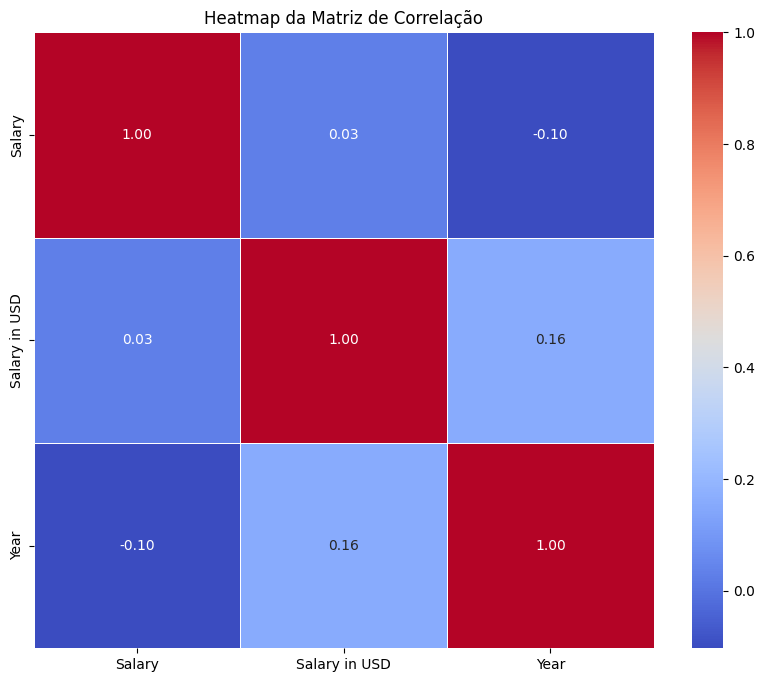

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Selecionar apenas as colunas numéricas
colunas_numericas = salarios.select_dtypes(include=['float64', 'int64']).columns
df_numerico = salarios[colunas_numericas]
 
# Calcular a correlação entre as variáveis numéricas
correlation_matriz = df_numerico.corr()
 
# Criar uma matriz de anotações com os valores formatados
annotations = np.array([[f"{val:.2f}" for val in row] for row in correlation_matriz.to_numpy()])
 
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matriz, annot=annotations, cmap='coolwarm', fmt='', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

Checando o ano com maior incidência de vagas:

C:\Users\lilit\AppData\Local\Temp\ipykernel_20728\4270070752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=salarios,x='Year', palette='tab10') # plot de contagem e cor 'tab10' do seaborn


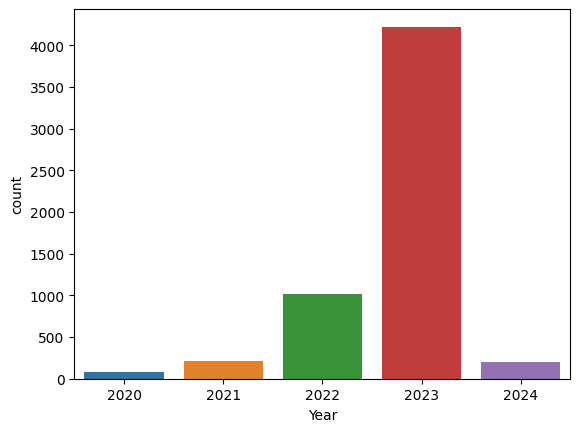

In [167]:
#Função cria um gráfico de contagem para cada coluna 'year', quantas vezes cada ano aparece no conjunto de dados
sns.countplot(data=salarios,x='Year', palette='tab10') # plot de contagem e cor 'tab10' do seaborn
plt.show()#mostra o grafico

Variação dos salários ao longo dos anos:

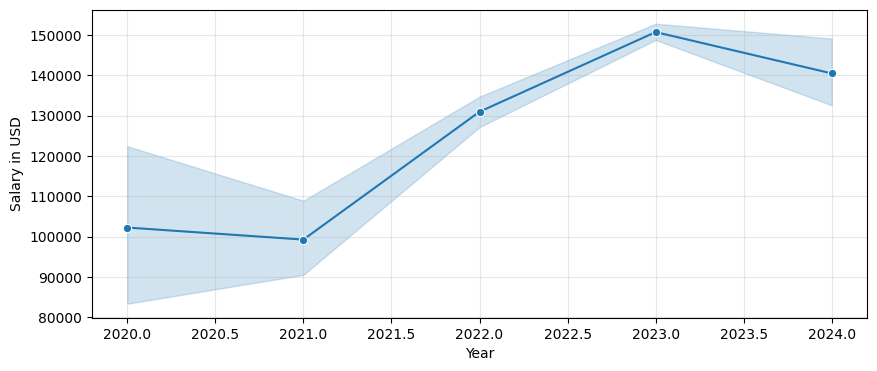

In [207]:
plt.figure(figsize=(10, 4)) #determinando altura e largura da figura
#grafico de linhas com seaborn
sns.lineplot(data=salarios, x="Year", y="Salary in USD", marker='o')
plt.grid(True, alpha= 0.3) #linhas da grade e transparencia 0.3
plt.show()

## Qual area com maior quantidade de vagas?

In [200]:
#imprimindo a quantidade de areas no data frame
print(f'São {salarios['Job Title'].nunique()} áreas na tabela')

São 132 áreas na tabela


In [213]:
# Conta a quantidade de vagas analisadas por area
quantidade_areas = salarios['Job Title'].value_counts().to_frame().reset_index()
#Renomeia as colunas do DataFrame resultante para "Job Title" e "total"
quantidade_areas.columns = ["Job Title", "Total"]
top5 = quantidade_areas.head()

C:\Users\lilit\AppData\Local\Temp\ipykernel_20728\1223542738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Job Title', data=top5, palette='viridis')


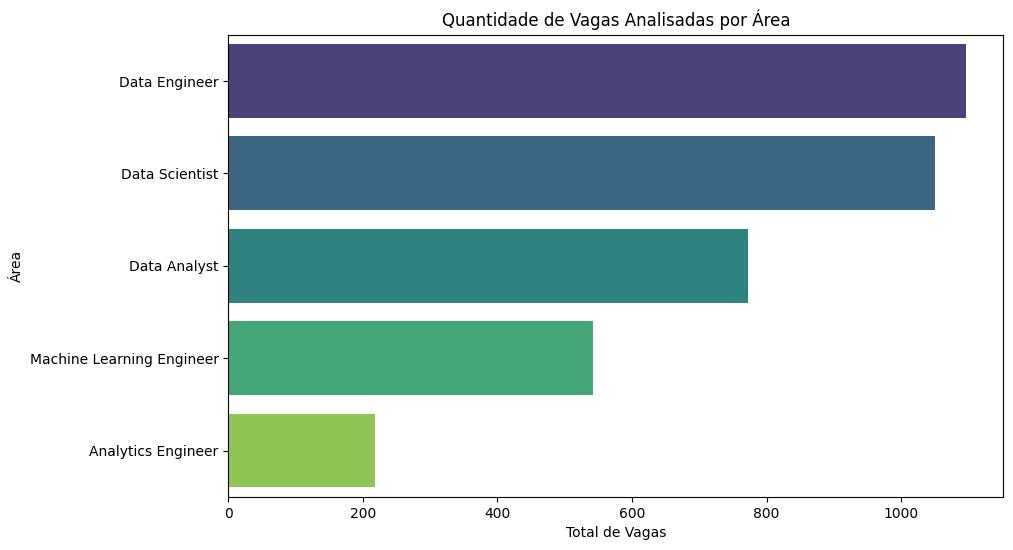

In [212]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Job Title', data=top5, palette='viridis')
plt.title('Quantidade de Vagas Analisadas por Área')
plt.xlabel('Total de Vagas')
plt.ylabel('Área')
plt.show()

## Top #3 paises com mais vagas

C:\Users\lilit\AppData\Local\Temp\ipykernel_20728\3429463382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Vagas', y='Company Location', data= top3_vagas, palette='viridis')


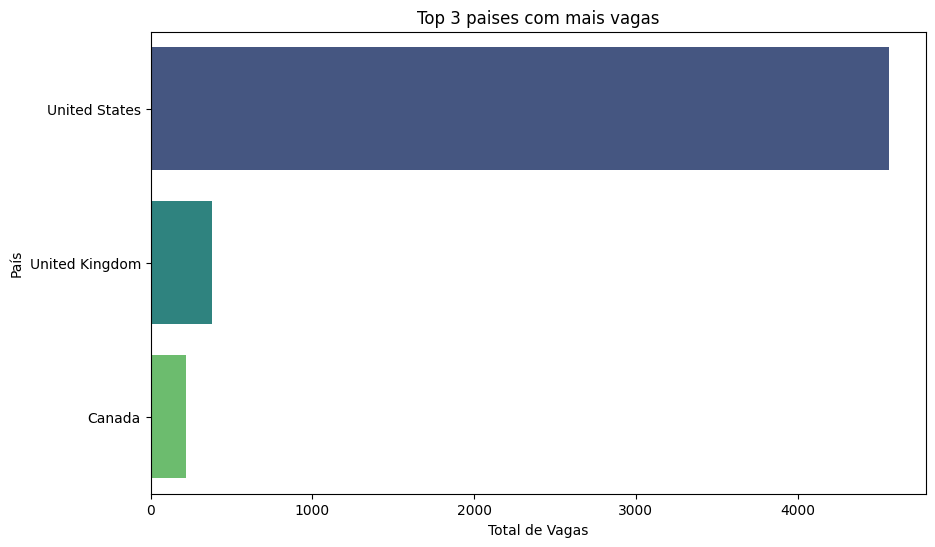

In [206]:
vagas_por_pais = salarios['Company Location'].value_counts().reset_index()
vagas_por_pais.columns = ['Company Location', 'Total Vagas']
top3_vagas = vagas_por_pais.head(3)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Vagas', y='Company Location', data= top3_vagas, palette='viridis')
plt.title('Top 3 paises com mais vagas')
plt.xlabel('Total de Vagas')
plt.ylabel('País')
plt.show()

## Top 3 maior faturamento

In [204]:
#somando a coluna salario e ordenando por ordem crescente
faturamento = salarios.groupby("Job Title")["Salary in USD"].sum().sort_values(ascending=False)
#selecionando apenas os 3 maiores faturamentos
top3 = faturamento.head(3)

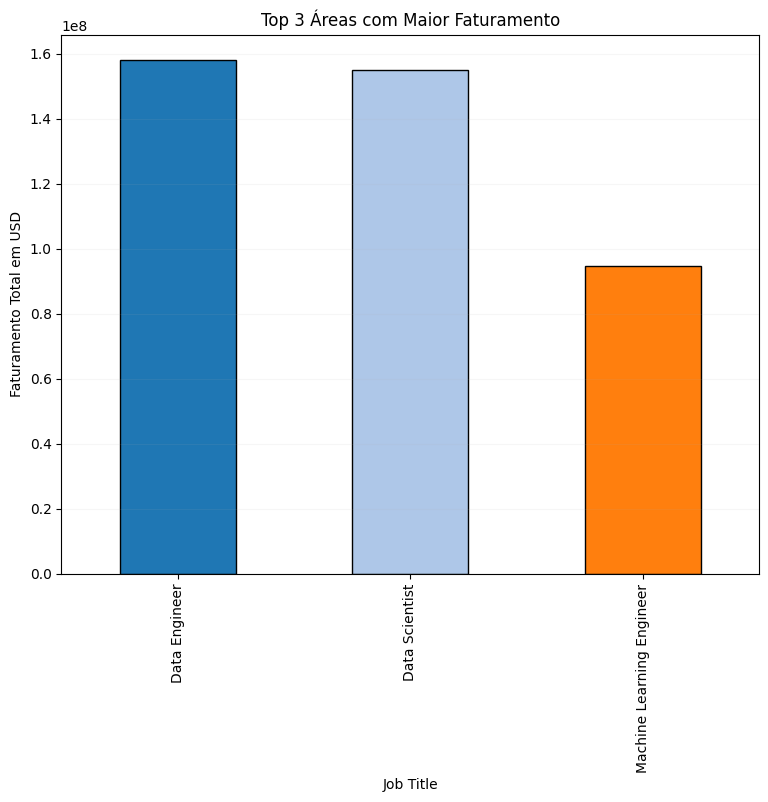

In [180]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(9, 7))
# Plota um gráfico de barras com os dados do 'top3'
top3.plot(kind='bar', color=sns.color_palette('tab20'), edgecolor='black', rot=90)
# Adiciona uma grade ao gráfico apenas no eixo y com transparência de 10%
plt.grid(axis='y', alpha=0.1)
# Define o título do gráfico
plt.title('Top 3 Áreas com Maior Faturamento')
# Define o rótulo do eixo y
plt.ylabel('Faturamento Total em USD')
# Exibe o gráfico
plt.show()


## Top 20 medias de salario por área de atuação

In [178]:
#agrupando por media de maior salario por area e ordenando do maior para o manor .sort_values('Salary in USD')
salario_area = salarios.groupby('Job Title')[['Salary in USD']].mean().sort_values('Salary in USD')

Text(0.5, 1.0, 'Top 20 Salary')

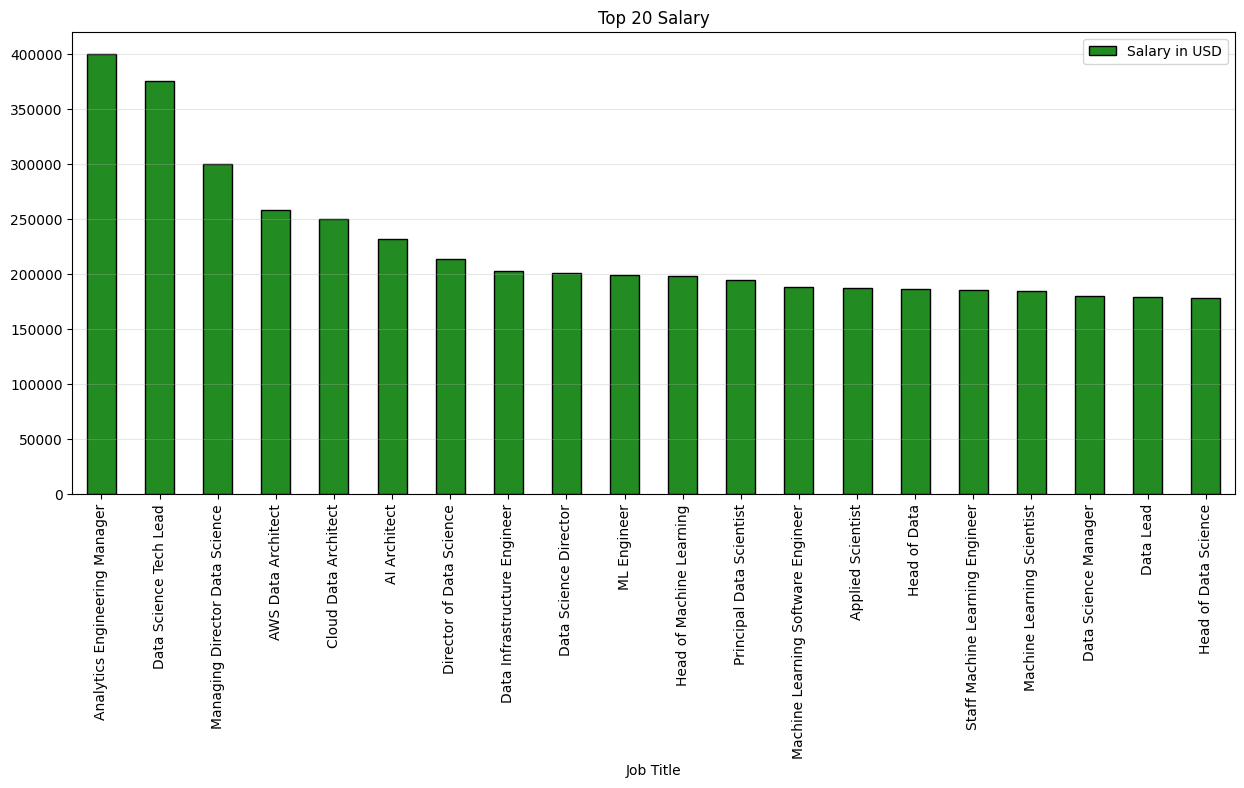

In [174]:
top15_Media_Salario = salario_area.sort_values('Salary in USD', ascending=False)[:20]
top15_Media_Salario.plot(kind = 'bar', figsize=(15, 6), color = 'forestgreen', edgecolor = 'black', rot = 90)
plt.grid(axis='y', alpha=0.3)
plt.title('Top 20 Salary')

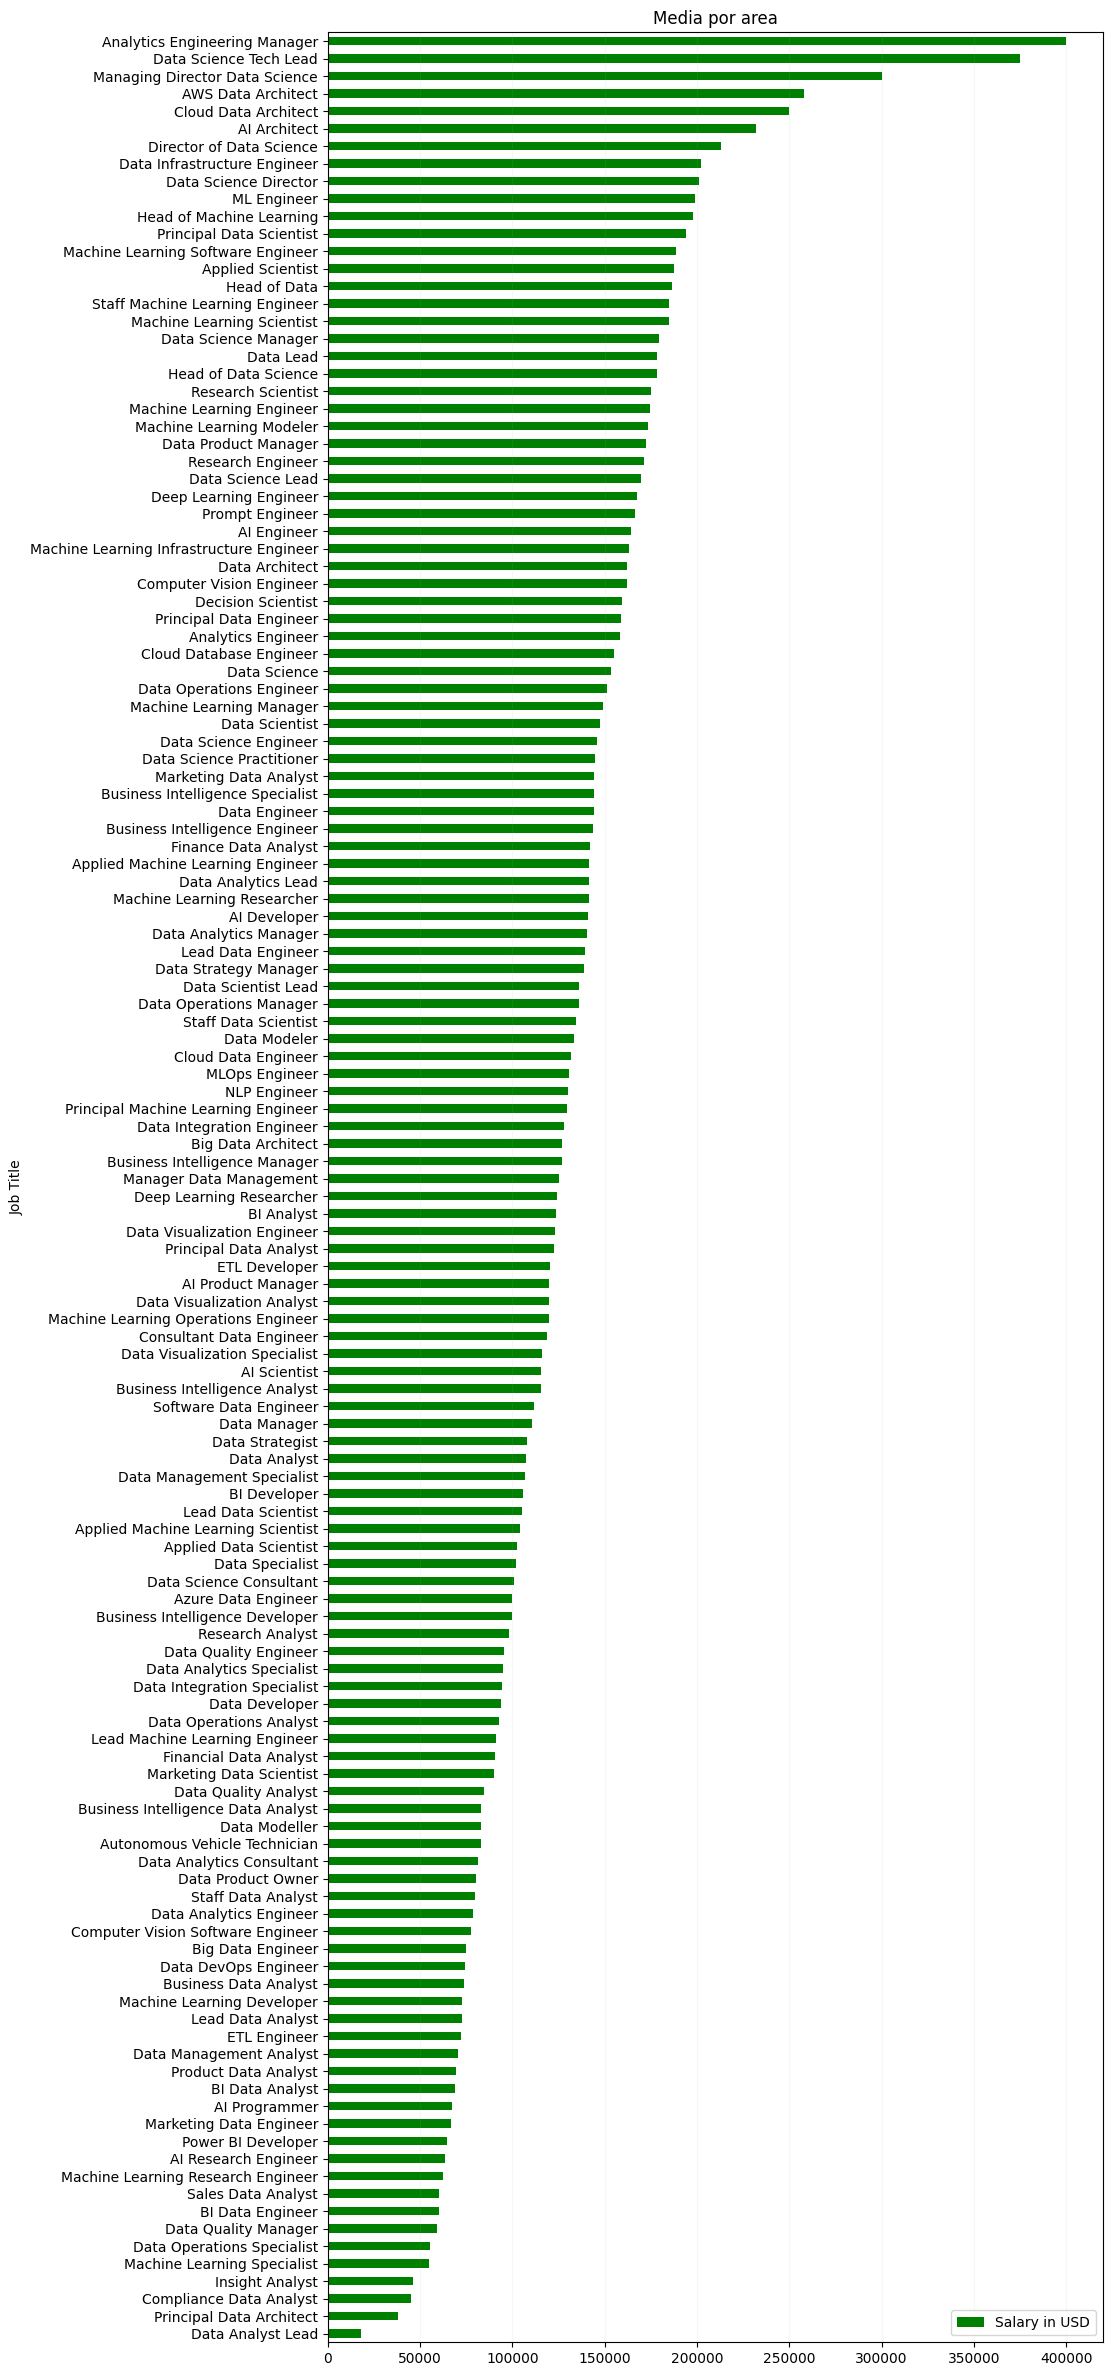

In [175]:
salario_area.plot(kind='barh', figsize=(10, 30), color ='green');
plt.title('Media por area')
plt.grid(axis= 'x', alpha= 0.1)